In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_segment_coordinates(depth,length, n_side_segments, n_bottom_segments):
    n_total_segmnets = 2* n_side_segments + n_bottom_segments
    dy = depth/n_side_segments
    dx = length/n_bottom_segments
    x_m = np.empty(n_total_segmnets)
    y_m = np.empty(n_total_segmnets)
    x_p = np.empty(n_total_segmnets)
    y_p = np.empty(n_total_segmnets)

    #initializing coordinates:
    x_m[0] = -length/2
    y_m[0] = 0
    x_p[0] = -length/2
    y_p[0] = -dy
   
    # first we initialize coordinates array by 1st side
    for i in range(1, n_side_segments):
        x_m[i] = -length/2
        y_m[i] = -dy*(i)
        x_p[i] = -length/2 
        y_p[i] = -dy*(i+1)    

    # now we caluclate points coordinates along bottom
    for i in range(n_side_segments,  n_side_segments+n_bottom_segments):
        i1= i-n_side_segments+1
        x_m[i]=-length/2+dx*(i1-1)
        y_m[i]=-depth
        x_p[i]=-length/2+dx*i1
        y_p[i]=-depth
    
    # last side
    for i in range(n_side_segments+n_bottom_segments, n_side_segments+n_bottom_segments+n_side_segments):
        i1=i-n_side_segments-n_bottom_segments + 1
        x_m[i]=length/2
        y_m[i]=-depth+dy*(i1-1)
        x_p[i]=length/2
        y_p[i]=-depth+dy*(i1)
    return x_m, y_m, x_p, y_p

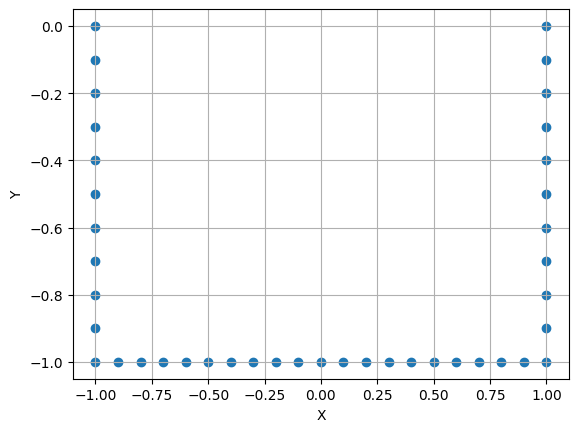

In [3]:
#box of draught depth and length 
depth = 1
length = 2
n_side_sements = 10
n_bottom_segments = 20

x_m, y_m , x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
plt.scatter(np.append(x_m, x_p[-1]) ,np.append(y_m, y_p[-1]))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [4]:
def get_matlab_results():
    file_path = '/home/anna/MATLAB/R2023b/bin/matlab_points.txt'
    with open(file_path, 'r') as file:
        arrays = []
        for line in file:
            array = np.array([float(x) for x in line.split()])
            arrays.append(array)
    return np.array(arrays)

matlab_results = get_matlab_results()
x_m, y_m, x_p, y_p = calculate_segment_coordinates(depth,length, n_side_sements, n_bottom_segments)
python_results = np.stack((x_m, y_m, x_p, y_p), axis=0)

for i in range(0,4):
    result = np.isclose(matlab_results[i],  python_results[i], rtol=10**(-3))
    print(result)
    assert np.allclose(matlab_results[i], python_results[i], atol=10**(-3)), "Arrays are not equal to 3 decimal places"

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
